In [24]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [28]:
sns.set_style('dark')

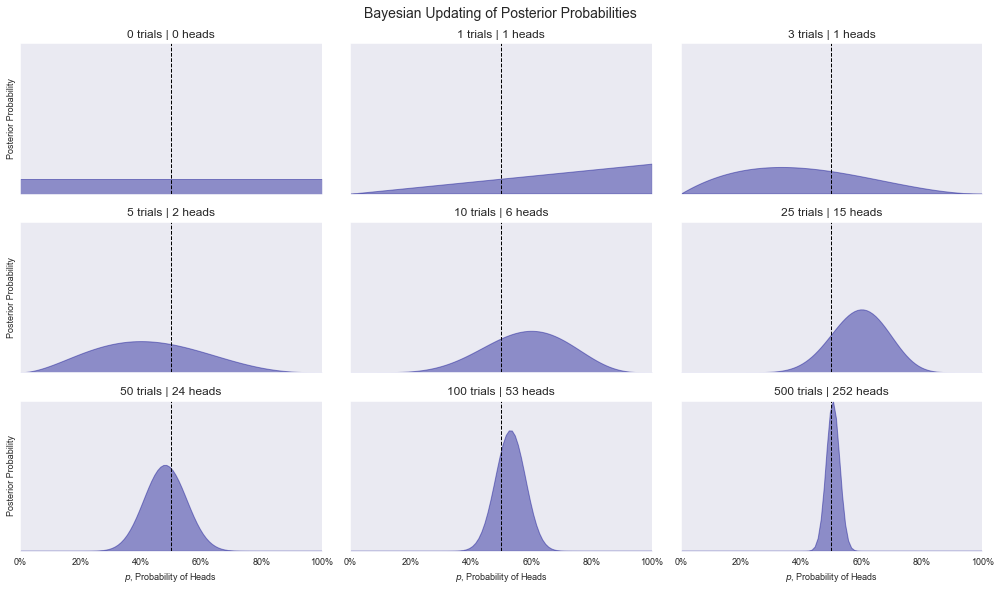

In [45]:
dist = stats.beta
n_trials = [0, 1, 3, 5, 10, 25, 50, 100, 500]
data = stats.bernoulli.rvs(p=0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)
fig, axes = plt.subplots(nrows=3, ncols=3,
                         figsize=(14, 8),
                         sharex=True)
axes = axes.flatten()

for i, trials in enumerate(n_trials):
    if i >=6:
        axes[i].set_xlabel("$p$, Probability of Heads")
        axes[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
    else:
        axes[i].axes.get_xaxis().set_visible(False)
    if i % 3 == 0:
        axes[i].set_ylabel("Posterior Probability") 
    axes[i].set_yticks([], [])
    
    heads = data[:trials].sum()
    y = dist.pdf(x, 1 + heads, trials + 1 - heads)
    axes[i].fill_between(x, 0, y, color='darkblue', alpha=0.4)
    axes[i].vlines(0.5, 0, max(10, np.max(y)), color="k", linestyles="--", lw=1)
    axes[i].set_title(f'{trials:,d} trials | {heads:,d} heads')
    axes[i].autoscale(tight=True)

fig.suptitle('Bayesian Probabilities: Updating the Posterior',
             y=1.02, fontsize=14)

fig.tight_layout()
fig.savefig('figures/updating', dpi=300)